Library Yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Function Membaca File

In [ ]:
restoran = pd.read_excel('restoran.xlsx')
restoran = restoran.to_numpy().copy()

Function Membership pelayanan

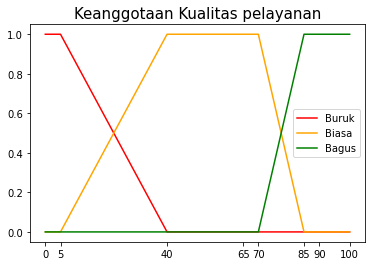

In [ ]:
def pelayanan_bagus(x, a=85, b=90):
    if x <= a:
      return 0
    elif x > a and x < b:
      return ((x-a)/(b-a))
    elif x >= b:
      return 1

def pelayanan_biasa(x, a=40, b=65, c=70, d=90):
    if x <= a:
      return 0
    elif x > a and x < b:
      return ((x-a)/(b-a))
    elif x >= b and x <= c :
      return 1
    elif x > c and x <= d :
      return -((x-d)/(d-c))
    elif x >= d:
      return 0

def pelayanan_buruk(x, c=5, d=65):
    if x <= c:
      return 1
    if x > c and x <= d:
      return -((x-d)/(d-c))
    elif x >= d:
      return 0

#Visualisasi Membership Function Pelayanan
nilai_1 = [0, 5, 40, 65, 70, 85, 90, 100]
kategori_1 = [1, 1, 0, 0, 0, 0, 0, 0]

nilai_2 = [0, 5, 40, 65, 70, 85, 90, 100]
kategori_2 = [0, 0, 1, 1, 1, 0, 0, 0]

nilai_3 = [0, 5, 40, 65, 70, 85, 90, 100]
kategori_3 = [0, 0, 0, 0, 0, 1, 1, 1]

plt.xticks([0, 5, 40, 65, 70, 85, 90, 100])
plt.title('Keanggotaan Kualitas pelayanan',fontsize=15)

plt.plot(nilai_1, kategori_1, color='red', label='Buruk')
plt.plot(nilai_2, kategori_2, color='orange',label='Biasa')
plt.plot(nilai_3, kategori_3, color='green',label='Bagus')
plt.legend()

Function Membership Kualitas Makanan

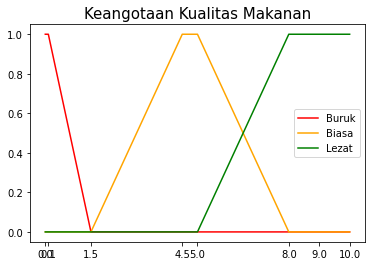

In [ ]:
def makanan_lezat(x, a=8, b=9):
    if x <= a:
      return 0
    elif x > a and x < b:
      return ((x-a)/(b-a))
    elif x >= b:
      return 1

def makanan_biasa(x, a=1.5, b=4.5, c=5, d=9):
    if x <= a:
      return 0
    elif x > a and x < b:
      return ((x-a)/(b-a))
    elif x >= b and x <= c :
      return 1
    elif x > c and x <= d :
      return -((x-d)/(d-c))
    elif x >= d:
      return 0

def makanan_buruk(x, c=0.1, d=4.5):
    if x <= c:
      return 1
    elif x > c and x <= d:
      return -((x-d)/(d-c))
    elif x >= d:
      return 0

#Visualisasi Membership Function Makanan
nilai_1 = [0, 0.1, 1.5, 4.5, 5, 8, 9, 10]
Kategori_1 = [1, 1, 1, 0, 0, 0, 0, 0]

nilai_2 = [0, 0.1, 1.5, 4.5, 5, 8, 9, 10]
kategori_2 = [0, 0, 0, 1, 1, 0, 0, 0]

nilai_3 = [0, 0.1, 1.5, 4.5, 5, 8, 9, 10]
kategori_3 = [0, 0, 0, 0, 0, 1, 1, 1]

plt.xticks([0, 0.1, 1.5, 4.5, 5, 8, 9, 10])
plt.title('Keangotaan Kualitas Makanan', fontSize=15)

plt.plot(nilai_1, kategori_1, color='red', label='Buruk')
plt.plot(nilai_2, kategori_2, color='orange',label='Biasa')
plt.plot(nilai_3, kategori_3, color='green',label='Lezat')
plt.legend()

Function Fuzzifikasi

Function Inferensi

In [ ]:
def inferensi(kualitas_pelayanan, kualitas_makanan):
  keputusan = {'iya': [],'mungkin': [], 'tidak': []}

  keputusan['iya'].append(min(kualitas_pelayanan['bagus'],kualitas_makanan['biasa']))
  keputusan['iya'].append(min(kualitas_pelayanan['bagus'],kualitas_makanan['lezat']))
  keputusan['mungkin'].append(min(kualitas_pelayanan['bagus'],kualitas_makanan['buruk']))

  keputusan['mungkin'].append(min(kualitas_pelayanan['biasa'],kualitas_makanan['lezat']))
  keputusan['mungkin'].append(min(kualitas_pelayanan['biasa'],kualitas_makanan['biasa']))
  keputusan['tidak'].append(min(kualitas_pelayanan['biasa'],kualitas_makanan['buruk']))

  keputusan['mungkin'].append(min(kualitas_pelayanan['buruk'],kualitas_makanan['lezat']))
  keputusan['mungkin'].append(min(kualitas_pelayanan['buruk'],kualitas_makanan['biasa']))
  keputusan['tidak'].append(min(kualitas_pelayanan['buruk'],kualitas_makanan['buruk']))

  keputusan['iya'] = max(keputusan['iya'])
  keputusan['mungkin'] = max(keputusan['mungkin'])
  keputusan['tidak'] = max(keputusan['tidak'])

  return keputusan


Function Defuzzifikasi (Metode Sugeno)

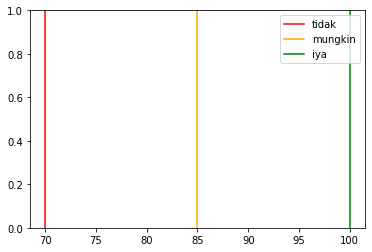

In [ ]:
def defuzzifikasi(keputusan):
    a = ((keputusan['iya'] * 100) + (keputusan['mungkin'] * 85) + (keputusan['tidak'] * 70))
    b = keputusan['iya'] + keputusan['mungkin'] + keputusan['tidak']
    hasil_defuzzifikasi = a/b
    hasil_defuzzifikasi = "{:0.2f}".format(hasil_defuzzifikasi)

    return hasil_defuzzifikasi

#Visualisasi Keanggotaan Output
plt.axvline(70, 0, 1, color='red', label='tidak')
plt.axvline(85, 0, 1, color='orange', label='mungkin')
plt.axvline(100, 0, 1, color='green', label='iya')
plt.legend()
plt.show()


Main Function

In [ ]:
def fuzzy(restoran):
  nilai = []
  hasil = restoran
  hasil = np.delete(hasil, 1, 1)
  hasil = np.delete(hasil, 1, 1)


  for i in range(restoran.shape[0]):
    #Fuzzifikasi
    pelayanan = fuzzifikasi_pelayanan(restoran[i,1])
    makanan = fuzzifikasi_makanan(restoran[i,2])

    #Inferensi
    keputusan =  inferensi(pelayanan, makanan)

    #Defuzzifikasi
    nilai_fuzzy = defuzzifikasi(keputusan)
    nilai.append(nilai_fuzzy)


  hasil = pd.DataFrame(hasil, columns=['ID Restoran'])
  hasil['Nilai'] = pd.Series(nilai, index=hasil.index)
  hasil.Nilai = pd.to_numeric(hasil.Nilai, errors='coerce')
  hasil.sort_values(by=['Nilai'], inplace=True, ascending=False)
  hasil = hasil.head(10)

  return hasil

result = fuzzy(restoran)
print(result)

    ID Restoran   Nilai
41           42  100.00
23           24  100.00
33           34   98.20
78           79   95.91
90           91   93.92
51           52   93.92
68           69   92.50
2             3   88.40
65           66   85.00
64           65   85.00


Function Output File

In [ ]:
#Output berupa ID dari 10 Restoran terbaik
file_hasil = pd.DataFrame(result)
file_hasil = file_hasil.drop(columns=['Nilai'])
print(file_hasil)

#Menyimpan output ke dalam file 'peringkat.xlsx'
filepath = 'peringkat.xlsx'
file_hasil.to_excel(filepath, index=False)

    ID Restoran
41           42
23           24
33           34
78           79
90           91
51           52
68           69
2             3
65           66
64           65
